In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def between_delimiter():
    print()
    print('----------------------------------------------------------------------------------------------')
    print()

In [3]:
def eda(data_path):
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)

    data = pd.read_csv(data_path)
    
    new_cols = [col.strip().replace(' ','_').lower() for col in data.columns]
    data.rename(columns={key:val for (key,val) in zip(data.columns,new_cols)},inplace=True)
    
    print('Sample of the data:')
    display(data.head(10))
    between_delimiter()
    
    print('Data columns types:')
    display(data.dtypes)
    types = np.array(data.dtypes)
    ints = [x for x in types if (x=='int64' or x=='int32')]
    floats = [x for x in types if (x=='float64' or x=='float32')]
    bools = [x for x in types if x=='bool']
    objects = [x for x in types if (x=='O' or x=='object')]
    strings = [x for x in types if x=='str']
    datetimes = [x for x in types if x=='datetime64']
    between_delimiter()
    
    if len(ints)+len(floats)>0:
        print('Quantitative variables:')
        display(data.describe())
        between_delimiter()
    if len(objects)>0:
        print('Object variables:')
        display(data.describe(include = [object]))
        for col in data.columns:
            if data[col].dtype in objects:
                n=10
                if data[col].nunique()>n:
                    n=int(input("'"+str(col)+"' column contains "+str(data[col].nunique())+" unique values. How many do you want to display?"))
                print("- '"+str(col)+"' column values:")
                print("  ",data[col].unique()[:n])
                if data[col].nunique()>n:
                    print('  .\n  .\n  .')
                print()
        between_delimiter()
    if len(datetimes)>0:
        print('Datetime variables:')
        display(data.describe(datetime_is_numeric=True))
        between_delimiter()
        
    print('Missing data:')
    missing_counter = 0
    for col in data.columns:
        df = data[data[col].isnull()==True]
        if len(df)>0:
            print("- '"+str(col)+"' column:")
            display(df)
            missing_counter += 1
    if missing_counter == 0:
        print('  None')
    between_delimiter()
    
    for col in data.columns:
        if data[col].dtype in ints+floats:
            decision=input("Do you want to display a histogram of the '"+str(col)+"' column? (Yes = 1): ")
            if decision=='1':
                sns.histplot(data=data, x=col)
                plt.show()
        elif data[col].dtype in objects:
            decision=input("Do you want to display a bar chart of the '"+str(col)+"' column? (Yes = 1): ")
            if decision=='1':
                sns.countplot(x=col, data=data)
                plt.show()
                
    # between_delimiter()

Sample of the data:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692



----------------------------------------------------------------------------------------------

Data columns types:


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


----------------------------------------------------------------------------------------------

Quantitative variables:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



----------------------------------------------------------------------------------------------

Object variables:


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


- 'sex' column values:
   ['female' 'male']

- 'smoker' column values:
   ['yes' 'no']

- 'region' column values:
   ['southwest' 'southeast' 'northwest' 'northeast']


----------------------------------------------------------------------------------------------

Missing data:
  None

----------------------------------------------------------------------------------------------



Do you want to display a histogram of the 'age' column? (Yes = 1):  1


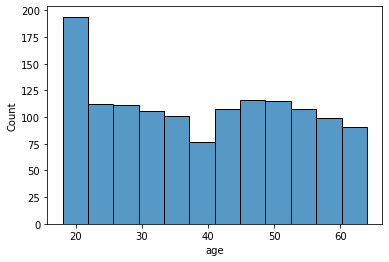

Do you want to display a bar chart of the 'sex' column? (Yes = 1):  1


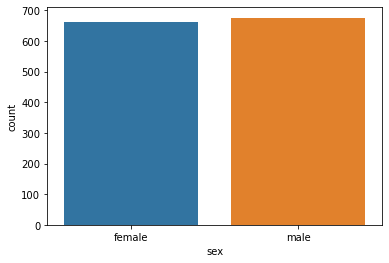

Do you want to display a histogram of the 'bmi' column? (Yes = 1):  1


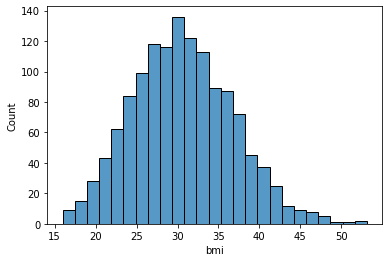

Do you want to display a histogram of the 'children' column? (Yes = 1):  1


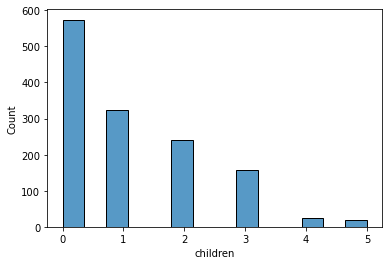

Do you want to display a bar chart of the 'smoker' column? (Yes = 1):  1


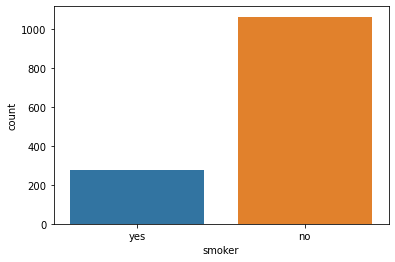

Do you want to display a bar chart of the 'region' column? (Yes = 1):  1


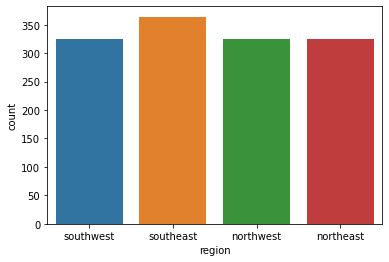

Do you want to display a histogram of the 'charges' column? (Yes = 1):  1


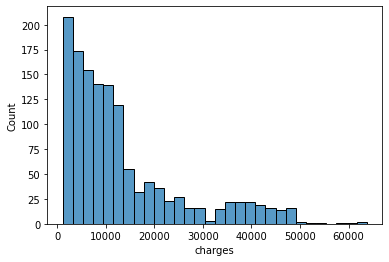

In [4]:
eda('test.csv')

Sample of the data:


,show_number,air_date,round,category,value,question,answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect shared billing with a grasshopper",the ant
6,4680,2004-12-31,Jeopardy!,HISTORY,$400,"Built in 312 B.C. to link Rome & the South of Italy, it's still in use today",the Appian Way
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,306 steals for the Bulls",Michael Jordan
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inches of snow fell at Rainier Paradise Ranger Station in this state",Washington
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packaging its merchandise came in & was first displayed on,Crate & Barrel



----------------------------------------------------------------------------------------------

Data columns types:


show_number     int64
air_date       object
round          object
category       object
value          object
question       object
answer         object
dtype: object


----------------------------------------------------------------------------------------------

Quantitative variables:


,show_number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000



----------------------------------------------------------------------------------------------

Object variables:


,air_date,round,category,value,question,answer
count,216930,216930,216930,216930,216930,216928
unique,3640,4,27995,150,216124,88268
top,1997-05-19,Jeopardy!,BEFORE & AFTER,$400,[audio clue],China
freq,62,107384,547,42244,17,216


'air_date' column contains 3640 unique values. How many do you want to display? 3


- 'air_date' column values:
   ['2004-12-31' '2010-07-06' '2000-12-18']
  .
  .
  .

- 'round' column values:
   ['Jeopardy!' 'Double Jeopardy!' 'Final Jeopardy!' 'Tiebreaker']



'category' column contains 27995 unique values. How many do you want to display? 3


- 'category' column values:
   ['HISTORY' "ESPN's TOP 10 ALL-TIME ATHLETES" 'EVERYBODY TALKS ABOUT IT...']
  .
  .
  .



'value' column contains 150 unique values. How many do you want to display? 3


- 'value' column values:
   ['$200' '$400' '$600']
  .
  .
  .



'question' column contains 216124 unique values. How many do you want to display? 3


- 'question' column values:
   ["For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory"
 'No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves'
 'The city of Yuma in this state has a record average of 4,055 hours of sunshine each year']
  .
  .
  .



'answer' column contains 88268 unique values. How many do you want to display? 3


- 'answer' column values:
   ['Copernicus' 'Jim Thorpe' 'Arizona']
  .
  .
  .


----------------------------------------------------------------------------------------------

Missing data:
- 'answer' column:


,show_number,air_date,round,category,value,question,answer
94817,4346,2003-06-23,Jeopardy!,"GOING ""N""SANE",$200,"It often precedes ""and void""",NaN
143297,6177,2011-06-21,Double Jeopardy!,NOTHING,$400,"This word for ""nothing"" precedes ""and void"" to mean ""not valid""",NaN



----------------------------------------------------------------------------------------------



Do you want to display a histogram of the 'show_number' column? (Yes = 1):  2
Do you want to display a bar chart of the 'air_date' column? (Yes = 1):  2
Do you want to display a bar chart of the 'round' column? (Yes = 1):  1


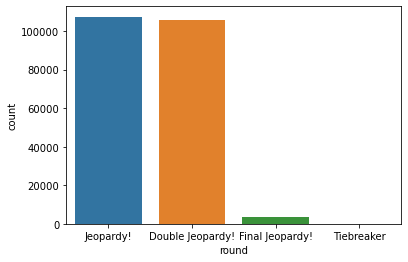

Do you want to display a bar chart of the 'category' column? (Yes = 1):  2
Do you want to display a bar chart of the 'value' column? (Yes = 1):  1


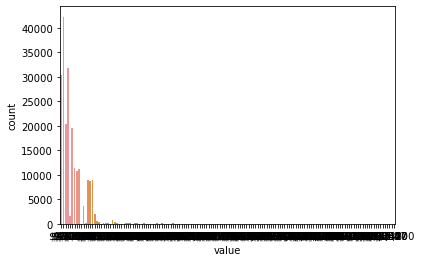

Do you want to display a bar chart of the 'question' column? (Yes = 1):  2
Do you want to display a bar chart of the 'answer' column? (Yes = 1):  2


In [5]:
eda('test2.csv')